# Milwaukee Housing Market Data Analysis

### Introduction
In this notebook, we will explore property sales data made available by the Milwaukee's Accesors Office. 

#### References
Milwaukee property sales data for 2020: https://data.milwaukee.gov/dataset/property-sales-data/resource/5ad3b44d-ba65-47eb-bd08-3f6cd07bf597
Notebooks that inspired this project: https://www.kaggle.com/code/janiobachmann/melbourne-comprehensive-housing-market-analysis

In [24]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("armslengthsales_2020_valid.csv")

## Data Exploration & Cleaning
While we will ultimately focus our analysis on residential properties, let's explore and clean the whole dataset first!

In [25]:
display(df.head())
display(df.info())

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,848609.0,Residential,40062000.0,9421 N MICHAEL CT,NaN,9.0,40.0,Colonial,Fiber Cement/Hardiplank,2.0,2006.0,11.0,"2,615",1.0,4.0,3.0,1.0,"16,588",2/13/2020,"$357,000"
1,859441.0,Residential,40062000.0,9421 N MICHAEL CT,NaN,9.0,40.0,Colonial,Fiber Cement/Hardiplank,2.0,2006.0,11.0,"2,615",1.0,4.0,3.0,1.0,"16,588",10/15/2020,"$369,900"
2,848069.0,Residential,40064000.0,9445 N MICHAEL CT,NaN,9.0,40.0,Colonial,Fiber Cement/Hardiplank,2.0,2006.0,10.0,"3,140",1.0,4.0,3.0,1.0,"10,607",1/24/2020,"$315,000"
3,849117.0,Residential,40073000.0,9563 N MICHAEL CT,NaN,9.0,40.0,Ranch,Fiber Cement/Hardiplank,1.0,2010.0,7.0,"2,153",1.0,3.0,2.0,1.0,"10,607",2/28/2020,"$338,000"
4,859049.0,Residential,49994000.0,9423 W COUNTY LINE RD,NaN,9.0,40.0,Cape Cod,Aluminum/Vinyl,1.0,1950.0,5.0,"1,103",1.0,3.0,1.0,0.0,"71,438",10/28/2020,"$184,000"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6355 entries, 0 to 6354
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropertyID    6354 non-null   float64
 1   PropType      6354 non-null   object 
 2   taxkey        6354 non-null   float64
 3   Address       6354 non-null   object 
 4   CondoProject  774 non-null    object 
 5   District      6353 non-null   float64
 6   nbhd          6329 non-null   float64
 7   Style         6336 non-null   object 
 8   Extwall       5550 non-null   object 
 9   Stories       6331 non-null   float64
 10  Year_Built    6346 non-null   float64
 11  Rooms         6054 non-null   float64
 12  FinishedSqft  6334 non-null   object 
 13  Units         6354 non-null   float64
 14  Bdrms         6054 non-null   float64
 15  Fbath         6354 non-null   float64
 16  Hbath         6354 non-null   float64
 17  Lotsize       6354 non-null   object 
 18  Sale_date     6354 non-null 

None

# Need to investigate Null values in:
    CondoProject
    District
    nbhd
    Style
    Extwall
    Stories
    Year_Built
    Rooms
    FinishedSqft
    Bdrms

## CondoProject

In [26]:
# CondoProject tells us the name of the condo if the property is a condo project. If it is not
# it returns a Null
df['CondoProject'].value_counts()

HARBOR FRONT                    26
RIVERBRIDGE                     23
LANDMARK ON THE LAKE            23
MILL VALLEY                     22
POINT ON THE RIVER CONDOS       22
                                ..
KENWOOD CONDOMINIUMS             1
LAKE LOCUST                      1
WARREN AVENUE CONDOMINIUM II     1
STONEHENGE                       1
EAST RIVER ROW                   1
Name: CondoProject, Length: 185, dtype: int64

## District

In [27]:
display(df[df['District'].isna()])
# Row 6354 is blank and can be removed
df1 = df.drop(axis=0,index=6354)

# Note that each row records an individual sale of a property. 
# are there any duplicate rows that match 767 where we can pull the District info from?
print('Any rows matching 767?')
display(df[(df['Address']== '5956 N LOVERS LANE RD') | (df['PropertyID'] == 855217.0)])

# There are not. So a quick google search and reference to Milwaukee's Aldermanic district map tells us this property
# is in district 2
# District map: https://city.milwaukee.gov/election/HowtoRunforPublicOffice/District-Maps/Map-City-of-Milwaukee-Alderman
df1.loc[df1['PropertyID']==855217.0,'District'] = 2
print(df1.iloc[767])

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
767,855217.0,Residential,1.800301e+09,5956 N LOVERS LANE RD,NaN,NaN,780.0,Ranch,Aluminum/Vinyl,1.0,1965.0,0.0,"2,062",1.0,3.0,2.0,0.0,"13,552",8/3/2020,"$200,000"
6354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Any rows matching 767?


,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
767,855217.0,Residential,1.800301e+09,5956 N LOVERS LANE RD,NaN,NaN,780.0,Ranch,Aluminum/Vinyl,1.0,1965.0,0.0,"2,062",1.0,3.0,2.0,0.0,"13,552",8/3/2020,"$200,000"


PropertyID                   855217.0
PropType                  Residential
taxkey                   1800301000.0
Address         5956 N LOVERS LANE RD
CondoProject                      NaN
District                          2.0
nbhd                            780.0
Style                           Ranch
Extwall                Aluminum/Vinyl
Stories                           1.0
Year_Built                     1965.0
Rooms                             0.0
FinishedSqft                    2,062
Units                             1.0
Bdrms                             3.0
Fbath                             2.0
Hbath                             0.0
Lotsize                        13,552
Sale_date                    8/3/2020
Sale_price                   $200,000
Name: 767, dtype: object


## nbhd

In [28]:
# 'nbhd' refers to the Assessor's Office neighborhood designator. 
# Reference map can be found here: https://data.milwaukee.gov/dataset/neighborhoods/resource/d1ab25e8-dfa4-4a6d-98f6-78f9a972ec7fp
display(df1[df1['nbhd'].isna()])

# These were determined by looking up the addresses on google maps and comparing 
# that to the reference map
df1.loc[df1['Address']=="2424 N 59TH ST",'nbhd']=21
df1.loc[df1['Address']=="2411 N 59TH ST",'nbhd']=21
df1.loc[df1['Address']=="2360 N 60TH ST",'nbhd']=21
df1.loc[df1['Address']=="2349-2351 N 57TH ST",'nbhd']=21
df1.loc[df1['Address']=="2375-2377 N 56TH ST",'nbhd']=21
df1.loc[df1['Address']=="2336-2338 N 56TH ST",'nbhd']=21
df1.loc[df1['Address']=="2628-2630 N 60TH ST",'nbhd']=21
df1.loc[df1['Address']=="2541 N 57TH ST",'nbhd']=21
df1.loc[df1['Address']=="2568 N 58TH ST",'nbhd']=21
df1.loc[df1['Address']=="2320 N 55TH ST",'nbhd']=21
df1.loc[df1['Address']=="2348-2350 N 55TH ST",'nbhd']=21
df1.loc[df1['Address']=="2354-2356 N 55TH ST",'nbhd']=21
df1.loc[df1['Address']=="2360 N 55TH ST",'nbhd']=21
df1.loc[df1['Address']=="2501 N 55TH ST",'nbhd']=21
df1.loc[df1['Address']=="2472 N 57TH ST",'nbhd']=21
df1.loc[df1['Address']=="2435 N 58TH ST",'nbhd']=21
df1.loc[df1['Address']=="5820 W MEINECKE AV",'nbhd']=21
df1.loc[df1['Address']=="2406 N 55TH ST",'nbhd']=21
df1.loc[df1['Address']=="2420 N 55TH ST",'nbhd']=21
df1.loc[df1['Address']=="2622-2624 N 61ST ST",'nbhd']=62
df1.loc[df1['Address']=="2544-2546 N 61ST ST",'nbhd']=62
df1.loc[df1['Address']=="2554 N 61ST ST",'nbhd']=62
df1.loc[df1['Address']=="1809 N VEL R PHILLIPS AV",'nbhd']=133
df1.loc[df1['Address']=="425 W RESERVOIR AV",'nbhd']=133
df1.loc[df1['Address']=="419-421 W VINE ST",'nbhd']=133

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
3139,861329.0,Residential,3.290101e+09,2424 N 59TH ST,NaN,10.0,NaN,Milwaukee Bungalow,Aluminum/Vinyl,1.0,1925.0,6.0,"1,204",1.0,3.0,1.0,0.0,"4,760",10/15/2020,"$180,000"
3140,850529.0,Residential,3.290106e+09,2411 N 59TH ST,NaN,10.0,NaN,Milwaukee Bungalow,Aluminum/Vinyl,1.0,1926.0,7.0,"1,291",1.0,3.0,1.0,0.0,"5,593",3/30/2020,"$183,000"
3142,855637.0,Residential,3.290158e+09,2360 N 60TH ST,NaN,10.0,NaN,Milwaukee Bungalow,Brick,1.0,1926.0,7.0,"1,377",1.0,3.0,1.0,0.0,"5,040",7/31/2020,"$122,500"
3143,849542.0,Residential,3.290206e+09,2349-2351 N 57TH ST,NaN,10.0,NaN,Dplx Bungalow,Stone,2.0,1938.0,10.0,"2,787",2.0,4.0,2.0,0.0,"4,998",3/16/2020,"$224,800"
3144,847933.0,Residential,3.290236e+09,2375-2377 N 56TH ST,NaN,10.0,NaN,Dplx Bungalow,Brick,1.5,1930.0,12.0,"2,550",2.0,5.0,2.0,1.0,"4,662",1/9/2020,"$255,000"
3145,852602.0,Residential,3.290244e+09,2336-2338 N 56TH ST,NaN,10.0,NaN,Dplx Bungalow,Wood,2.0,1928.0,10.0,"2,597",2.0,4.0,2.0,0.0,"5,040",5/20/2020,"$225,000"
3146,848237.0,Residential,3.290306e+09,2628-2630 N 60TH ST,NaN,10.0,NaN,Dplx Bungalow,Masonry/Frame,2.0,1929.0,11.0,"2,228",2.0,4.0,2.0,0.0,"4,800",1/21/2020,"$149,900"
3152,861444.0,Residential,3.290712e+09,2541 N 57TH ST,NaN,10.0,NaN,Milwaukee Bungalow,Aluminum/Vinyl,1.0,1926.0,5.0,810,1.0,2.0,1.0,0.0,"4,760",12/4/2020,"$57,500"
3153,859609.0,Residential,3.290729e+09,2568 N 58TH ST,NaN,10.0,NaN,Dplx Bungalow,Aluminum/Vinyl,1.5,1926.0,8.0,"1,501",2.0,3.0,2.0,0.0,"4,760",10/26/2020,"$130,000"
3155,863455.0,Residential,3.290912e+09,2320 N 55TH ST,NaN,10.0,NaN,Dplx Bungalow,Brick,1.5,1926.0,11.0,"2,489",2.0,4.0,2.0,0.0,"6,126",8/12/2020,"$165,000"


## style

In [29]:
display(df1[df1['Style'].isna()])

# We notice a patern here that many rows have Units,Year_Built = 0.0, these are vacant lots
# searching the addresses confirms this
# For vacant lots we will adopt the following 
#     Style = "vacant lot"
#     Extwall = "none"
#     Rooms = 0
#     Finishedsqft =0
#     Bdrms = 0

vacant_IDs = df1[(df1['Style'].isna()) & (df1['Extwall'].isna())]['PropertyID']
columns=['Style','Extwall','Rooms','FinishedSqft','Bdrms','Stories']
values=['vacant lot','none',0,0,0,0]

for id in vacant_IDs:
    df1.loc[df1.PropertyID==id,columns] = values
    
display(df1[df1['Style'].isna()])

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
11,859588.0,Residential,5.012800e+07,7836 W ANGELA AV,NaN,9.0,40.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,"12,272",11/4/2020,"$10,000"
49,855931.0,Residential,3.800970e+08,11741 W HEATHER DR,NaN,9.0,240.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,"17,997",7/28/2020,"$38,000"
50,850757.0,Residential,3.801120e+08,8655 N 117TH ST,NaN,9.0,240.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,"12,085",4/3/2020,"$35,400"
51,859926.0,Residential,3.801180e+08,11726 W HEATHER DR,NaN,9.0,240.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,"19,792",10/15/2020,"$45,400"
52,855081.0,Residential,3.801190e+08,11732 W HEATHER DR,NaN,9.0,240.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,"19,788",7/15/2020,"$40,000"
53,856528.0,Residential,3.801200e+08,11738 W HEATHER DR,NaN,9.0,240.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,"17,628",8/24/2020,"$45,400"
65,858845.0,Residential,4.003220e+08,9830 W DEAN RD,NaN,9.0,240.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,"10,831",10/12/2020,"$22,000"
66,858747.0,Residential,4.003440e+08,9818 W DEAN RD,NaN,9.0,240.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,"12,283",10/12/2020,"$21,000"
230,855821.0,Residential,1.090149e+09,7312 N 95TH ST,NaN,5.0,440.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,"15,746",7/29/2020,"$35,000"
674,852507.0,Residential,1.740648e+09,5857-5859 N 65TH ST,NaN,2.0,960.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,"4,920",5/27/2020,"$2,500"


,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price


## Extwall

In [30]:
display(df1[df1['Extwall'].isna()])

# what type of properties are missing Extwall data?
display(df1[df1['Extwall'].isna()]['PropType'].value_counts())

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
12,851572.0,Condominium,7.004500e+07,"9228 N 70TH ST, Unit 9",NORTHRIDGE WOOD LAKE,9.0,5010.0,Condo Townhouse,NaN,2.0,1973.0,7.0,"1,437",1.0,4.0,2.0,1.0,0,4/23/2020,"$89,900"
13,853643.0,Condominium,7.005800e+07,"9280 N 70TH ST, Unit 1",NORTHRIDGE WOOD LAKE,9.0,5010.0,Condo Townhouse,NaN,2.0,1973.0,7.0,"1,437",1.0,3.0,2.0,1.0,0,6/26/2020,"$90,000"
14,847931.0,Condominium,7.007200e+07,"9282 N 70TH ST, Unit 9",NORTHRIDGE WOOD LAKE,9.0,5010.0,Condo Ranch,NaN,1.0,1973.0,4.0,898,1.0,2.0,1.0,1.0,0,1/2/2020,"$64,900"
15,857956.0,Condominium,7.008900e+07,"6967 W GLENBROOK RD, Unit 11",NORTHRIDGE WOOD LAKE,9.0,5010.0,Condo Townhouse,NaN,2.0,1973.0,5.0,"1,437",1.0,3.0,2.0,1.0,0,9/30/2020,"$83,500"
16,858905.0,Condominium,3.102280e+08,8973 N 70TH ST,NORTHRIDGE EASTBAY,9.0,5020.0,Condo Townhouse,NaN,2.0,1973.0,5.0,"1,498",1.0,3.0,1.0,1.0,1,9/28/2020,"$119,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6349,860471.0,Condominium,7.160336e+09,1910 W SALEM ST,COLLEGE HEIGHTS,13.0,5360.0,Low Rise 1-3 Stories,NaN,2.0,1974.0,4.0,"1,100",1.0,2.0,1.0,1.0,1,11/11/2020,"$100,000"
6350,856464.0,Condominium,7.160347e+09,6330 S 20TH ST,COLLEGE HEIGHTS,13.0,5360.0,Low Rise 1-3 Stories,NaN,1.0,1974.0,5.0,"1,141",1.0,2.0,1.0,1.0,1,8/27/2020,"$110,000"
6351,857786.0,Condominium,7.160366e+09,6378 S 20TH ST,COLLEGE HEIGHTS,13.0,5360.0,Low Rise 1-3 Stories,NaN,2.0,1974.0,5.0,"1,100",1.0,2.0,1.0,1.0,1,9/16/2020,"$95,000"
6352,857816.0,Condominium,7.160367e+09,6366 S 20TH ST,COLLEGE HEIGHTS,13.0,5360.0,Low Rise 1-3 Stories,NaN,2.0,1974.0,5.0,"1,100",1.0,2.0,1.0,1.0,1,9/29/2020,"$100,000"


Condominium     777
Commercial        4
Lg Apartment      3
Residential       2
Name: PropType, dtype: int64

In [31]:
# investigating each PropType
print('Condominiums')
display(df1.loc[df1['PropType']=='Condominium','Extwall'].value_counts())
print('Commercial')
display(df1.loc[df1['PropType']=='Commercial','Extwall'].value_counts())
print('Lg Apartment')
display(df1.loc[df1['PropType']=='Lg Apartment','Extwall'].value_counts())
print('Residential')
display(df1.loc[df1['PropType']=='Residential','Extwall'].value_counts())

Condominiums


Series([], Name: Extwall, dtype: int64)

Commercial


Brick                      60
Concrete Block             51
Alum/Vynyl Siding          15
Fiber Cement/Hardiplank     7
Metal Siding                4
Masonary Frame              3
Other                       3
Brick on Block              2
Precast Masonary            2
Stone                       1
Asphalt/Other               1
Name: Extwall, dtype: int64

Lg Apartment


Brick                      115
Masonary Frame              15
Alum/Vynyl Siding           14
Fiber Cement/Hardiplank     13
Concrete Block               2
Stone                        2
Precast Masonary             2
Name: Extwall, dtype: int64

Residential


Aluminum/Vinyl             3091
Brick                      1064
Wood                        314
Asphalt/Other               277
Stone                       172
Masonry/Frame               136
Stucco                       88
Fiber Cement/Hardiplank      43
Block                        27
Prem Wood                    21
none                         18
Alum/Vynyl Siding             1
Name: Extwall, dtype: int64

In [32]:
# looks like no condos have a Extwall value, so we will label them all "condominium"
# for the other Property types, we will assign the relatively few missing values the most common value
df1.loc[df1['PropType'] == 'Condominium','Extwall'] = 'Condominium'
df1.loc[(df1['PropType'] == 'Commercial') & (df1['Extwall'].isna()),'Extwall'] = 'Brick'
df1.loc[(df1['PropType'] == 'Lg Apartment') & (df1['Extwall'].isna()),'Extwall'] = 'Brick'
df1.loc[(df1['PropType'] == 'Residential') & (df1['Extwall'].isna()),'Extwall'] = 'Aluminum/Vinyl'

## Stories

In [33]:
display(df1[df1['Stories'].isna()])

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
48,862076.0,Commercial,3.699891e+08,11410 W BROWN DEER RD,NaN,9.0,6202.0,Pole Building,Metal Siding,NaN,1945.0,NaN,"2,280",1.0,NaN,0.0,0.0,"178,683",12/15/2020,"$450,000"
166,853403.0,Lg Apartment,8.301310e+08,6619-6623 W BRADLEY RD,NaN,9.0,6970.0,AP4 (Conv Apt with 21 or more Units),Brick,NaN,NaN,NaN,0,24.0,NaN,0.0,0.0,0,6/18/2020,"$1,220,000"
167,851941.0,Lg Apartment,8.301310e+08,6619-6623 W BRADLEY RD,NaN,9.0,6970.0,AP4 (Conv Apt with 21 or more Units),Brick,NaN,NaN,NaN,0,24.0,NaN,0.0,0.0,0,5/14/2020,"$1,300,000"
560,861433.0,Lg Apartment,1.519960e+09,9430-9442 W FOND DU LAC AV,NaN,2.0,6970.0,AP4 (Conv Apt with 21 or more Units),Brick,NaN,NaN,NaN,"29,200",28.0,NaN,0.0,0.0,0,12/9/2020,"$1,800,000"
3043,851406.0,Commercial,3.230599e+09,2428-2432 N 7TH ST,NaN,6.0,6258.0,Church,Brick,NaN,1984.0,NaN,"5,000",1.0,NaN,0.0,2.0,"21,191",4/21/2020,"$287,000"
3295,848138.0,Residential,3.530820e+09,116 W VINE ST,NaN,6.0,2910.0,OBY,Aluminum/Vinyl,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,"5,000",1/27/2020,"$80,000"
3559,858416.0,Condominium,3.592157e+09,"1313 N FRANKLIN PL, Unit 703",BREAKWATER CONDOS,4.0,5811.0,High Rise > 12 Stories,Condominium,NaN,2009.0,0.0,"1,931",1.0,2.0,2.0,0.0,0,10/9/2020,"$598,000"
3560,862900.0,Condominium,3.592166e+09,"1313 N FRANKLIN PL, Unit 806",BREAKWATER CONDOS,4.0,5811.0,High Rise > 12 Stories,Condominium,NaN,2009.0,0.0,"2,062",1.0,2.0,2.0,0.0,0,11/6/2020,"$815,000"
3561,853202.0,Condominium,3.592183e+09,"1313 N FRANKLIN PL, Unit 1105",BREAKWATER CONDOS,4.0,5811.0,High Rise > 12 Stories,Condominium,NaN,2009.0,0.0,"1,140",1.0,1.0,1.0,1.0,0,6/12/2020,"$472,500"
3562,857735.0,Condominium,3.592192e+09,"1313 N FRANKLIN PL, Unit 1302",BREAKWATER CONDOS,4.0,5811.0,High Rise > 12 Stories,Condominium,NaN,2009.0,0.0,"1,133",1.0,1.0,1.0,1.0,0,10/1/2020,"$365,000"


In [34]:
# The first six properties are missing a lot of info, Bdrms, rooms, stories. 
# If we can match them to any other properties, we can recover this info, otherwise we will drop them. 

#display(df1[df1.Address == '11410 W BROWN DEER RD'])
# no matches

#display(df1[df1.taxkey == 830131000.0])
# no matches

#display(df1[df1.Address == '9430-9442 W FOND DU LAC AV'])
# no matches

#display(df1[df1.Address == '2428-2432 N 7TH ST'])
# no matches

#display(df1[df1.Address == '116 W VINE ST'])
# no matches

display(df1[df1.CondoProject == 'BREAKWATER CONDOS'])
# no matches
display(df1[df1.CondoProject == 'MODERNE'])
# no matches
display(df1[df1.CondoProject == 'WISCONSIN TOWER'])
# all other condos in the Wisconsin Tower sold this year are 1 story
display(df1[df1.CondoProject == 'CITYSIDE PLAZA'])
# no matches
display(df1[df1.CondoProject == 'Bay View Twindominiums'])
# no matches

# Lets look at Stories value counts for Condos
display(df1.loc[df1['PropType']=='Condominium','Stories'].value_counts())


# we will drop the first 6 properties as they are missing more informatio then we can comfortable assuem
# for the condo's we will assume they are one story
# Breakwater Condos
df1.loc[df1['PropertyID'] == 858416.0 ,'Stories'] = 1
df1.loc[df1['PropertyID'] == 862900.0 ,'Stories'] = 1
df1.loc[df1['PropertyID'] == 853202.0 ,'Stories'] = 1
df1.loc[df1['PropertyID'] == 857735.0 ,'Stories'] = 1
df1.loc[df1['PropertyID'] == 859646.0 ,'Stories'] = 1
# Moderne condos
df1.loc[df1['PropertyID'] == 860488.0 ,'Stories'] = 1
df1.loc[df1['PropertyID'] == 852405.0 ,'Stories'] = 1
# Wisconsin Tower
df1.loc[df1['PropertyID'] == 852054.0 ,'Stories'] = 1
# Cityside Plaza
df1.loc[df1['PropertyID'] == 860412.0 ,'Stories'] = 1
df1.loc[df1['PropertyID'] == 851493.0 ,'Stories'] = 1
df1.loc[df1['PropertyID'] == 860856.0 ,'Stories'] = 1
df1.loc[df1['PropertyID'] == 857060.0 ,'Stories'] = 1
# Bayview Twindominiums
df1.loc[df1['PropertyID'] == 858404.0 ,'Stories'] = 1


df2 = df1.drop(axis=0,index=[48,166,167,560,3043,3295])


,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
3559,858416.0,Condominium,3.592157e+09,"1313 N FRANKLIN PL, Unit 703",BREAKWATER CONDOS,4.0,5811.0,High Rise > 12 Stories,Condominium,NaN,2009.0,0.0,"1,931",1.0,2.0,2.0,0.0,0,10/9/2020,"$598,000"
3560,862900.0,Condominium,3.592166e+09,"1313 N FRANKLIN PL, Unit 806",BREAKWATER CONDOS,4.0,5811.0,High Rise > 12 Stories,Condominium,NaN,2009.0,0.0,"2,062",1.0,2.0,2.0,0.0,0,11/6/2020,"$815,000"
3561,853202.0,Condominium,3.592183e+09,"1313 N FRANKLIN PL, Unit 1105",BREAKWATER CONDOS,4.0,5811.0,High Rise > 12 Stories,Condominium,NaN,2009.0,0.0,"1,140",1.0,1.0,1.0,1.0,0,6/12/2020,"$472,500"
3562,857735.0,Condominium,3.592192e+09,"1313 N FRANKLIN PL, Unit 1302",BREAKWATER CONDOS,4.0,5811.0,High Rise > 12 Stories,Condominium,NaN,2009.0,0.0,"1,133",1.0,1.0,1.0,1.0,0,10/1/2020,"$365,000"
3563,859646.0,Condominium,3.592214e+09,"1313 N FRANKLIN PL, Unit 1701",BREAKWATER CONDOS,4.0,5811.0,High Rise > 12 Stories,Condominium,NaN,2009.0,0.0,"2,525",1.0,3.0,3.0,0.0,0,10/30/2020,"$1,000,000"


,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
3624,860488.0,Condominium,3.612124e+09,"1141 N OLD WORLD THIRD ST, Unit 2802",MODERNE,4.0,5899.0,High Rise > 12 Stories,Condominium,NaN,2011.0,0.0,"1,182",1.0,1.0,1.0,1.0,0,10/1/2020,"$390,000"
3625,852405.0,Condominium,3.612135e+09,"1141 N OLD WORLD THIRD ST, Unit 3002",MODERNE,4.0,5899.0,High Rise > 12 Stories,Condominium,NaN,2011.0,0.0,"1,853",1.0,2.0,2.0,1.0,0,5/7/2020,"$840,000"


,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
3766,852084.0,Condominium,3.910767e+09,"606 W WISCONSIN AV, Unit 303",WISCONSIN TOWER,4.0,5999.0,High Rise > 12 Stories,Condominium,1.0,1929.0,3.0,720,1.0,1.0,1.0,0.0,0,5/15/2020,"$130,000"
3767,852054.0,Condominium,3.910770e+09,"606 W WISCONSIN AV, Unit 306",WISCONSIN TOWER,4.0,5999.0,High Rise > 12 Stories,Condominium,NaN,1929.0,3.0,670,1.0,1.0,1.0,0.0,0,5/15/2020,"$125,900"
3768,851899.0,Condominium,3.910772e+09,"606 W WISCONSIN AV, Unit 308",WISCONSIN TOWER,4.0,5999.0,High Rise > 12 Stories,Condominium,1.0,1929.0,3.0,796,1.0,1.0,1.0,0.0,0,4/23/2020,"$130,000"
3769,854562.0,Condominium,3.910808e+09,"606 W WISCONSIN AV, Unit 1001",WISCONSIN TOWER,4.0,5999.0,High Rise > 12 Stories,Condominium,1.0,1929.0,4.0,947,1.0,1.0,1.0,0.0,0,7/13/2020,"$170,000"
3770,853711.0,Condominium,3.910812e+09,"606 W WISCONSIN AV, Unit 1101",WISCONSIN TOWER,4.0,5999.0,High Rise > 12 Stories,Condominium,1.0,1929.0,3.0,947,1.0,1.0,1.0,0.0,0,6/10/2020,"$177,500"
3771,848318.0,Condominium,3.910829e+09,"606 W WISCONSIN AV, Unit 1602",WISCONSIN TOWER,4.0,5999.0,High Rise > 12 Stories,Condominium,1.0,1929.0,5.0,"1,954",1.0,2.0,2.0,1.0,0,2/3/2020,"$324,600"


,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
3883,860412.0,Condominium,3.960416e+09,"239 E CHICAGO ST, Unit 205",CITYSIDE PLAZA,4.0,5384.0,Mid RIse 4-12 Stories,Condominium,NaN,1915.0,0.0,"1,450",1.0,2.0,2.0,0.0,0,9/28/2020,"$352,900"
3884,851493.0,Condominium,3.960426e+09,"239 E CHICAGO ST, Unit 305",CITYSIDE PLAZA,4.0,5384.0,Mid RIse 4-12 Stories,Condominium,NaN,1915.0,0.0,"1,450",1.0,2.0,2.0,0.0,0,4/15/2020,"$375,000"
3885,860856.0,Condominium,3.960450e+09,"239 E CHICAGO ST, Unit 509",CITYSIDE PLAZA,4.0,5384.0,Mid RIse 4-12 Stories,Condominium,NaN,1915.0,0.0,"1,652",1.0,2.0,2.0,1.0,0,11/16/2020,"$470,000"
3886,857060.0,Condominium,3.960466e+09,"239 E CHICAGO ST, Unit 708",CITYSIDE PLAZA,4.0,5384.0,Mid RIse 4-12 Stories,Condominium,NaN,1915.0,0.0,"1,652",1.0,3.0,2.0,1.0,0,8/27/2020,"$475,000"


,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
4793,858404.0,Condominium,5.031692e+09,2926 S ELLEN ST,Bay View Twindominiums,14.0,5713.0,Condo Townhouse,Condominium,NaN,2005.0,0.0,"2,352",1.0,3.0,2.0,1.0,1,10/2/2020,"$325,000"


1.0    565
2.0    149
3.0     19
2.5     15
1.5     13
3.5      2
4.0      1
Name: Stories, dtype: int64

## Year Built

In [35]:
display(df2[df2['Year_Built'].isna()])

# since these are all vacant lots, we'll leave them as is

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
2971,859063.0,Residential,3.200913e+09,1136 E WALWORTH ST,NaN,3.0,3330.0,vacant lot,none,0.0,NaN,0.0,0,0.0,0.0,0.0,0.0,"3,625",10/23/2020,"$35,000"
3431,856052.0,Residential,3.550726e+09,1813-1815 N ARLINGTON PL,NaN,3.0,3240.0,vacant lot,none,0.0,NaN,0.0,0,0.0,0.0,0.0,0.0,"8,600",8/20/2020,"$141,000"
3764,852660.0,Residential,3.900537e+09,1317 W JUNEAU AV,NaN,4.0,3040.0,vacant lot,none,0.0,NaN,0.0,0,0.0,0.0,0.0,0.0,"3,600",8/20/2020,"$7,500"
4852,859255.0,Residential,5.051164e+09,2840 S GREELEY ST,NaN,14.0,4910.0,vacant lot,none,0.0,NaN,0.0,0,0.0,0.0,0.0,0.0,"5,808",10/1/2020,"$42,000"


## Rooms

In [36]:
display(df2[df2['Rooms'].isna()])
display(df2[df2['Rooms'].isna()]['Style'].value_counts())
#Probably more here then we'll be able to resolve, but let's take a look at a couple of the
# more promenient property types



,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
24,854778.0,Commercial,3.104210e+08,7400 W BROWN DEER RD,NaN,9.0,6441.0,Medical Clinic,Concrete Block,2.0,1978.0,NaN,"7,444",4.0,NaN,0.0,0.0,"47,350",7/30/2020,"$600,000"
26,863199.0,Commercial,3.201610e+08,8260 W NORTHRIDGE MALL RD,NaN,9.0,6202.0,Warehouse Building - 1 Story,Brick,1.0,1972.0,NaN,"14,650",1.0,NaN,0.0,0.0,"218,366",1/29/2020,"$160,000"
27,848604.0,Commercial,3.201670e+08,8901 N GRANVILLE STATION RD,NaN,9.0,6202.0,Strip Shopping Center,Brick,1.0,2005.0,NaN,"8,293",4.0,NaN,0.0,0.0,"48,352",1/30/2020,"$540,000"
28,855096.0,Commercial,3.299971e+08,7800-7810 W BROWN DEER RD,NaN,9.0,6453.0,Office Building - Multi Story ( Ofc & Apt),Brick,2.0,1973.0,NaN,"184,712",5.0,NaN,0.0,0.0,0,7/15/2020,"$13,300,000"
58,849694.0,Lg Apartment,3.903920e+08,10901 W DONNA DR,NaN,9.0,6970.0,Subsidized Apartments,Alum/Vynyl Siding,3.0,2004.0,NaN,"99,636",96.0,NaN,0.0,0.0,"174,235",2/27/2020,"$8,600,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6171,849781.0,Commercial,6.410052e+09,5140-5148 S 3RD ST,NaN,13.0,6420.0,Warehouse Building - 1 Story,Concrete Block,1.0,1978.0,NaN,"36,020",4.0,NaN,0.0,0.0,"75,184",3/9/2020,"$1,625,000"
6222,854321.0,Commercial,6.441721e+09,5252-5264 S 27TH ST,NaN,13.0,6286.0,Strip Shopping Center,Concrete Block,1.0,1987.0,NaN,"11,098",7.0,NaN,0.0,0.0,"30,144",7/13/2020,"$1,665,000"
6246,858604.0,Lg Apartment,6.680196e+09,3319 W IONA TRCE,NaN,13.0,6850.0,AP1 (Conventional Apt with 4-6 Units),Brick,2.0,1961.0,NaN,"4,778",6.0,NaN,0.0,0.0,"15,340",10/8/2020,"$475,000"
6247,859310.0,Lg Apartment,6.680214e+09,3007 W IONA TRCE,NaN,13.0,6850.0,AP1 (Conventional Apt with 4-6 Units),Brick,2.0,1959.0,NaN,"4,304",4.0,NaN,0.0,0.0,"10,660",1/6/2020,"$345,000"


AP1 (Conventional Apt with 4-6 Units)                 106
AP2 (Conventional Apt with 7-11 Units)                 26
AP3 (Conventional Apt with 12-20 Units)                14
Store Building - Single tenant, 1 story                12
Warehouse Building - 1 Story                           12
Store Bldg - Multi Story (Store & Apt, Store & Ofc     11
AP4 (Conv Apt with 21 or more Units)                    7
Strip Shopping Center                                   6
Multi Story Warehouse                                   5
Svs Station w Conv Store                                5
Sit Down Restaurant                                     5
Townhouse Apartment                                     5
Medical Clinic                                          4
Office Building - Multi Story ( Ofc & Apt)              4
Subsidized Apartments                                   4
Trucking Terminal                                       4
Day Care Center                                         3
Store Building

In [37]:
display(df2.loc[df2['Style'] =='AP1 (Conventional Apt with 4-6 Units)','Rooms'])
# none of the properties listed as AP1 have room data

display(df2.loc[df2['Style'] =='AP2 (Conventional Apt with 7-11 Units)','Rooms'])
# neither do AP2, I smell a trend

286    NaN
575    NaN
583    NaN
584    NaN
585    NaN
        ..
6047   NaN
6108   NaN
6122   NaN
6246   NaN
6247   NaN
Name: Rooms, Length: 106, dtype: float64

80     NaN
359    NaN
572    NaN
763    NaN
978    NaN
1001   NaN
1181   NaN
1191   NaN
1204   NaN
1207   NaN
1225   NaN
1939   NaN
1961   NaN
2852   NaN
2933   NaN
3963   NaN
5111   NaN
5228   NaN
5229   NaN
5306   NaN
5444   NaN
5667   NaN
5688   NaN
5689   NaN
5758   NaN
6156   NaN
Name: Rooms, dtype: float64

## FinishedSqft

In [38]:
display(df2[df2['FinishedSqft'].isna()])
# this also appears to be a vacant lot


,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
3029,862530.0,Residential,3.212301e+09,930 E NORTH AV,NaN,3.0,2890.0,OBY,Aluminum/Vinyl,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,"2,700",12/15/2020,"$25,500"


## Bdrms

In [39]:
display(df2[df2['Bdrms'].isna()])

# similar to 'rooms', this is probably best left as is

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
24,854778.0,Commercial,3.104210e+08,7400 W BROWN DEER RD,NaN,9.0,6441.0,Medical Clinic,Concrete Block,2.0,1978.0,NaN,"7,444",4.0,NaN,0.0,0.0,"47,350",7/30/2020,"$600,000"
26,863199.0,Commercial,3.201610e+08,8260 W NORTHRIDGE MALL RD,NaN,9.0,6202.0,Warehouse Building - 1 Story,Brick,1.0,1972.0,NaN,"14,650",1.0,NaN,0.0,0.0,"218,366",1/29/2020,"$160,000"
27,848604.0,Commercial,3.201670e+08,8901 N GRANVILLE STATION RD,NaN,9.0,6202.0,Strip Shopping Center,Brick,1.0,2005.0,NaN,"8,293",4.0,NaN,0.0,0.0,"48,352",1/30/2020,"$540,000"
28,855096.0,Commercial,3.299971e+08,7800-7810 W BROWN DEER RD,NaN,9.0,6453.0,Office Building - Multi Story ( Ofc & Apt),Brick,2.0,1973.0,NaN,"184,712",5.0,NaN,0.0,0.0,0,7/15/2020,"$13,300,000"
58,849694.0,Lg Apartment,3.903920e+08,10901 W DONNA DR,NaN,9.0,6970.0,Subsidized Apartments,Alum/Vynyl Siding,3.0,2004.0,NaN,"99,636",96.0,NaN,0.0,0.0,"174,235",2/27/2020,"$8,600,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6171,849781.0,Commercial,6.410052e+09,5140-5148 S 3RD ST,NaN,13.0,6420.0,Warehouse Building - 1 Story,Concrete Block,1.0,1978.0,NaN,"36,020",4.0,NaN,0.0,0.0,"75,184",3/9/2020,"$1,625,000"
6222,854321.0,Commercial,6.441721e+09,5252-5264 S 27TH ST,NaN,13.0,6286.0,Strip Shopping Center,Concrete Block,1.0,1987.0,NaN,"11,098",7.0,NaN,0.0,0.0,"30,144",7/13/2020,"$1,665,000"
6246,858604.0,Lg Apartment,6.680196e+09,3319 W IONA TRCE,NaN,13.0,6850.0,AP1 (Conventional Apt with 4-6 Units),Brick,2.0,1961.0,NaN,"4,778",6.0,NaN,0.0,0.0,"15,340",10/8/2020,"$475,000"
6247,859310.0,Lg Apartment,6.680214e+09,3007 W IONA TRCE,NaN,13.0,6850.0,AP1 (Conventional Apt with 4-6 Units),Brick,2.0,1959.0,NaN,"4,304",4.0,NaN,0.0,0.0,"10,660",1/6/2020,"$345,000"


# Residential housing analysis

We are going to refine our analysis to residential porperties. 

In [40]:
styles=(df2['Style'].value_counts())
display(styles.index)

Index(['Ranch', 'Cape Cod', 'Res O/S A & 1/2', 'Milwaukee Bungalow',
       'Duplex O/S', 'Mid RIse 4-12 Stories', 'Dplx Bungalow', 'Colonial',
       'Duplex N/S', 'Low Rise 1-3 Stories', 'Residence O/S 2sty+', 'Cottage',
       'Condo Townhouse', 'AP1 (Conventional Apt with 4-6 Units)',
       'High Rise > 12 Stories', 'Townhouse', 'Triplex',
       'Multiple Residential Bldgs',
       'Store Bldg - Multi Story (Store & Apt, Store & Ofc', 'Duplex-Cottage',
       'Tudor', 'AP2 (Conventional Apt with 7-11 Units)', 'Split Level',
       'Res O/S 1 Story', 'vacant lot',
       'AP3 (Conventional Apt with 12-20 Units)', 'Mansion',
       'Store Building - Single tenant, 1 story',
       'Warehouse Building - 1 Story', 'Bi-Level', 'Condo Duplex',
       'Condo Ranch', 'Office Building - Multi Story ( Ofc & Apt)', 'Tavern',
       'AP4 (Conv Apt with 21 or more Units)', 'Strip Shopping Center',
       'Svs Station w Conv Store', 'Medical Clinic', 'Multi Story Warehouse',
       'Sit Down R

In [43]:
res_styles=['Ranch', 'Cape Cod', 'Res O/S A & 1/2', 'Milwaukee Bungalow', 'Duplex O/S', 'Mid RIse 4-12 Stories'
            , 'Dplx Bungalow', 'Colonial', 'Duplex N/S', 'Low Rise 1-3 Stories', 'Residence O/S 2sty+', 'Cottage'
            , 'Condo Townhouse', 'AP1 (Conventional Apt with 4-6 Units)', 'High Rise > 12 Stories', 'Townhouse'
            , 'Triplex', 'Multiple Residential Bldgs','Duplex-Cottage', 'Tudor'
            , 'AP2 (Conventional Apt with 7-11 Units)', 'Split Level', 'Res O/S 1 Story'
            , 'AP3 (Conventional Apt with 12-20 Units)', 'Mansion','Bi-Level', 'Condo Duplex', 'Condo Ranch'
            ,'AP4 (Conv Apt with 21 or more Units)', 'Townhouse Apartment', 'Residence With Commercial Usage'
            , 'Subsidized Apartments', 'Condo BI/TRI Level', 'R/M (Res. Multiple) or Rooming House']

house = df2.loc[df2['Style'].isin(res_styles),:]

In [45]:
display(house)
display(house['Style'].value_counts())

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,848609.0,Residential,4.006200e+07,9421 N MICHAEL CT,NaN,9.0,40.0,Colonial,Fiber Cement/Hardiplank,2.0,2006.0,11.0,"2,615",1.0,4.0,3.0,1.0,"16,588",2/13/2020,"$357,000"
1,859441.0,Residential,4.006200e+07,9421 N MICHAEL CT,NaN,9.0,40.0,Colonial,Fiber Cement/Hardiplank,2.0,2006.0,11.0,"2,615",1.0,4.0,3.0,1.0,"16,588",10/15/2020,"$369,900"
2,848069.0,Residential,4.006400e+07,9445 N MICHAEL CT,NaN,9.0,40.0,Colonial,Fiber Cement/Hardiplank,2.0,2006.0,10.0,"3,140",1.0,4.0,3.0,1.0,"10,607",1/24/2020,"$315,000"
3,849117.0,Residential,4.007300e+07,9563 N MICHAEL CT,NaN,9.0,40.0,Ranch,Fiber Cement/Hardiplank,1.0,2010.0,7.0,"2,153",1.0,3.0,2.0,1.0,"10,607",2/28/2020,"$338,000"
4,859049.0,Residential,4.999400e+07,9423 W COUNTY LINE RD,NaN,9.0,40.0,Cape Cod,Aluminum/Vinyl,1.0,1950.0,5.0,"1,103",1.0,3.0,1.0,0.0,"71,438",10/28/2020,"$184,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6349,860471.0,Condominium,7.160336e+09,1910 W SALEM ST,COLLEGE HEIGHTS,13.0,5360.0,Low Rise 1-3 Stories,Condominium,2.0,1974.0,4.0,"1,100",1.0,2.0,1.0,1.0,1,11/11/2020,"$100,000"
6350,856464.0,Condominium,7.160347e+09,6330 S 20TH ST,COLLEGE HEIGHTS,13.0,5360.0,Low Rise 1-3 Stories,Condominium,1.0,1974.0,5.0,"1,141",1.0,2.0,1.0,1.0,1,8/27/2020,"$110,000"
6351,857786.0,Condominium,7.160366e+09,6378 S 20TH ST,COLLEGE HEIGHTS,13.0,5360.0,Low Rise 1-3 Stories,Condominium,2.0,1974.0,5.0,"1,100",1.0,2.0,1.0,1.0,1,9/16/2020,"$95,000"
6352,857816.0,Condominium,7.160367e+09,6366 S 20TH ST,COLLEGE HEIGHTS,13.0,5360.0,Low Rise 1-3 Stories,Condominium,2.0,1974.0,5.0,"1,100",1.0,2.0,1.0,1.0,1,9/29/2020,"$100,000"


Ranch                                      1539
Cape Cod                                    976
Res O/S A & 1/2                             419
Milwaukee Bungalow                          413
Duplex O/S                                  410
Mid RIse 4-12 Stories                       366
Dplx Bungalow                               309
Colonial                                    304
Duplex N/S                                  266
Low Rise 1-3 Stories                        189
Residence O/S 2sty+                         157
Cottage                                     129
Condo Townhouse                             115
AP1 (Conventional Apt with 4-6 Units)       106
High Rise > 12 Stories                       87
Townhouse                                    72
Triplex                                      54
Multiple Residential Bldgs                   46
Duplex-Cottage                               41
Tudor                                        35
Split Level                             

In [63]:
# we need to convert "Sale_price" to a numberic type for graphing
house['sale']= house['Sale_price'].str.strip('$').replace(',','', regex=True).apply(pd.to_numeric,errors='coerce')

/var/folders/18/c9qxbdrj57j0v40wm5dy0j9w0000gn/T/ipykernel_92165/1125694020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['sale']= house['Sale_price'].str.strip('$').replace(',','', regex=True).apply(pd.to_numeric,errors='coerce')


Text(0.5, 1.0, 'District 15')

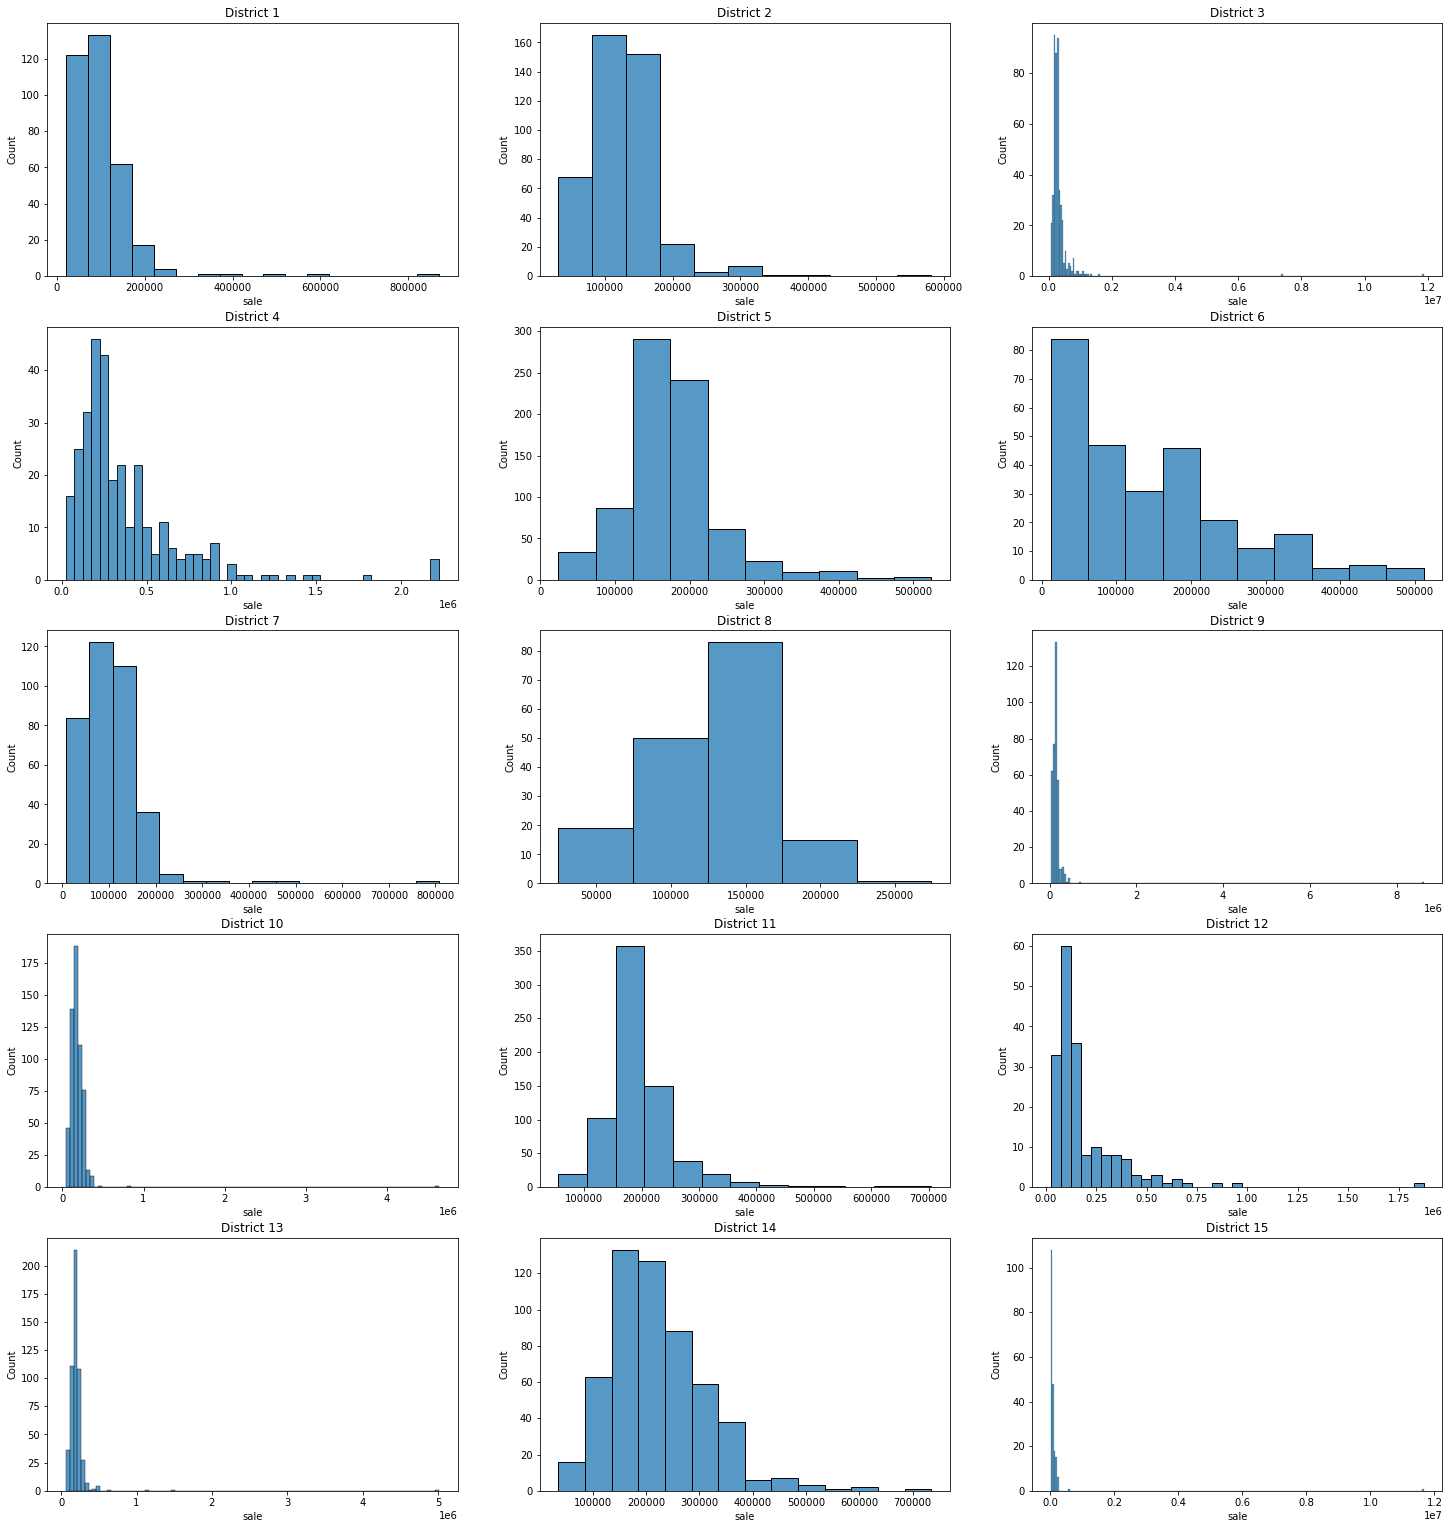

In [65]:
bins =30
width= 50000
fig, axes = plt.subplots(5, 3,sharex= False,sharey=False, figsize=(25,27))

sns.histplot(house[house['District']==1]['sale'], binwidth=width, ax=axes[0,0]).set_title('District 1')
sns.histplot(house[house['District']==2]['sale'], binwidth=width, ax=axes[0,1]).set_title('District 2')
sns.histplot(house[house['District']==3]['sale'], binwidth=width, ax=axes[0,2]).set_title('District 3')
sns.histplot(house[house['District']==4]['sale'], binwidth=width, ax=axes[1,0]).set_title('District 4')
sns.histplot(house[house['District']==5]['sale'], binwidth=width, ax=axes[1,1]).set_title('District 5')
sns.histplot(house[house['District']==6]['sale'], binwidth=width, ax=axes[1,2]).set_title('District 6')
sns.histplot(house[house['District']==7]['sale'], binwidth=width, ax=axes[2,0]).set_title('District 7')
sns.histplot(house[house['District']==8]['sale'], binwidth=width, ax=axes[2,1]).set_title('District 8')
sns.histplot(house[house['District']==9]['sale'], binwidth=width, ax=axes[2,2]).set_title('District 9')
sns.histplot(house[house['District']==10]['sale'],binwidth=width, ax=axes[3,0]).set_title('District 10')
sns.histplot(house[house['District']==11]['sale'],binwidth=width, ax=axes[3,1]).set_title('District 11')
sns.histplot(house[house['District']==12]['sale'],binwidth=width, ax=axes[3,2]).set_title('District 12')
sns.histplot(house[house['District']==13]['sale'],binwidth=width, ax=axes[4,0]).set_title('District 13')
sns.histplot(house[house['District']==14]['sale'],binwidth=width, ax=axes[4,1]).set_title('District 14')
sns.histplot(house[house['District']==15]['sale'],binwidth=width, ax=axes[4,2]).set_title('District 15')


Text(0.5, 1.0, 'Sale Prices by Property Style')

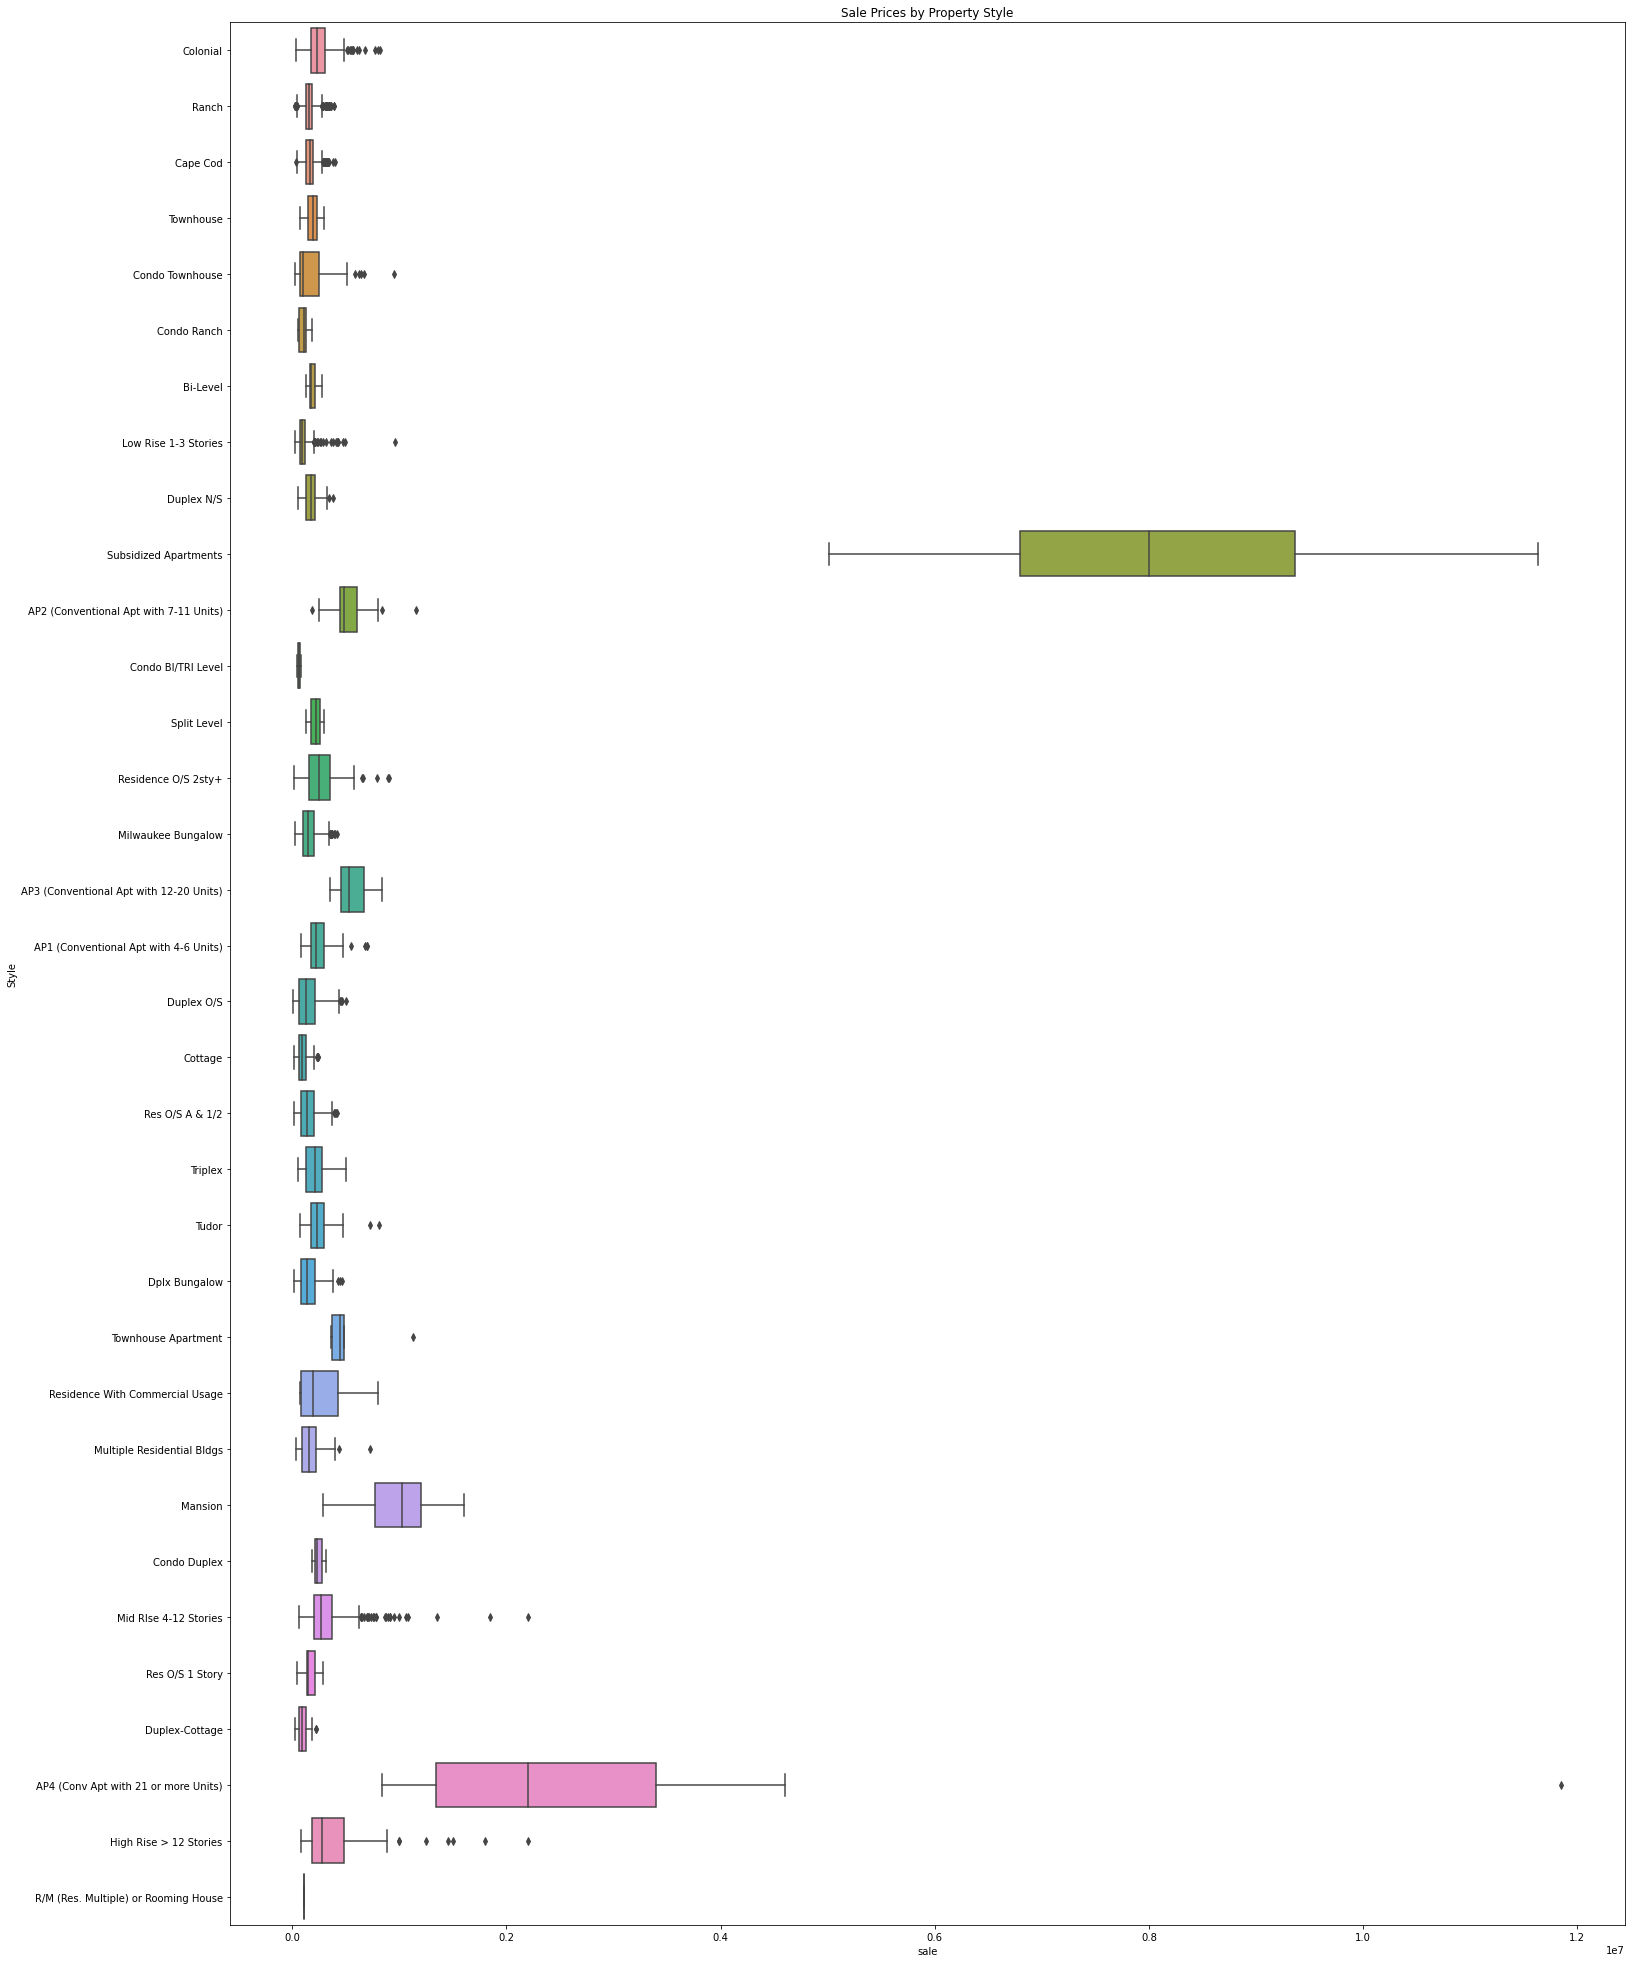

In [98]:
# lets look for the very large values that are washing out some districts

fig, ax = plt.subplots(figsize=(25,35))

sns.boxplot(x="sale",y='Style', data = house, orient='h').set_title('Sale Prices by Property Style')

Subsidized Apartments are far above average and AP4 (Conv Apt with 21 or more Units) also have very large sale values. It is possible these sales represent entire apartment buildings. 

In [116]:
house2 = house.loc[~house['Style'].isin(['AP4 (Conv Apt with 21 or more Units)','Subsidized Apartments']),:]

Text(0.5, 1.0, 'Sale Prices by Property Style')

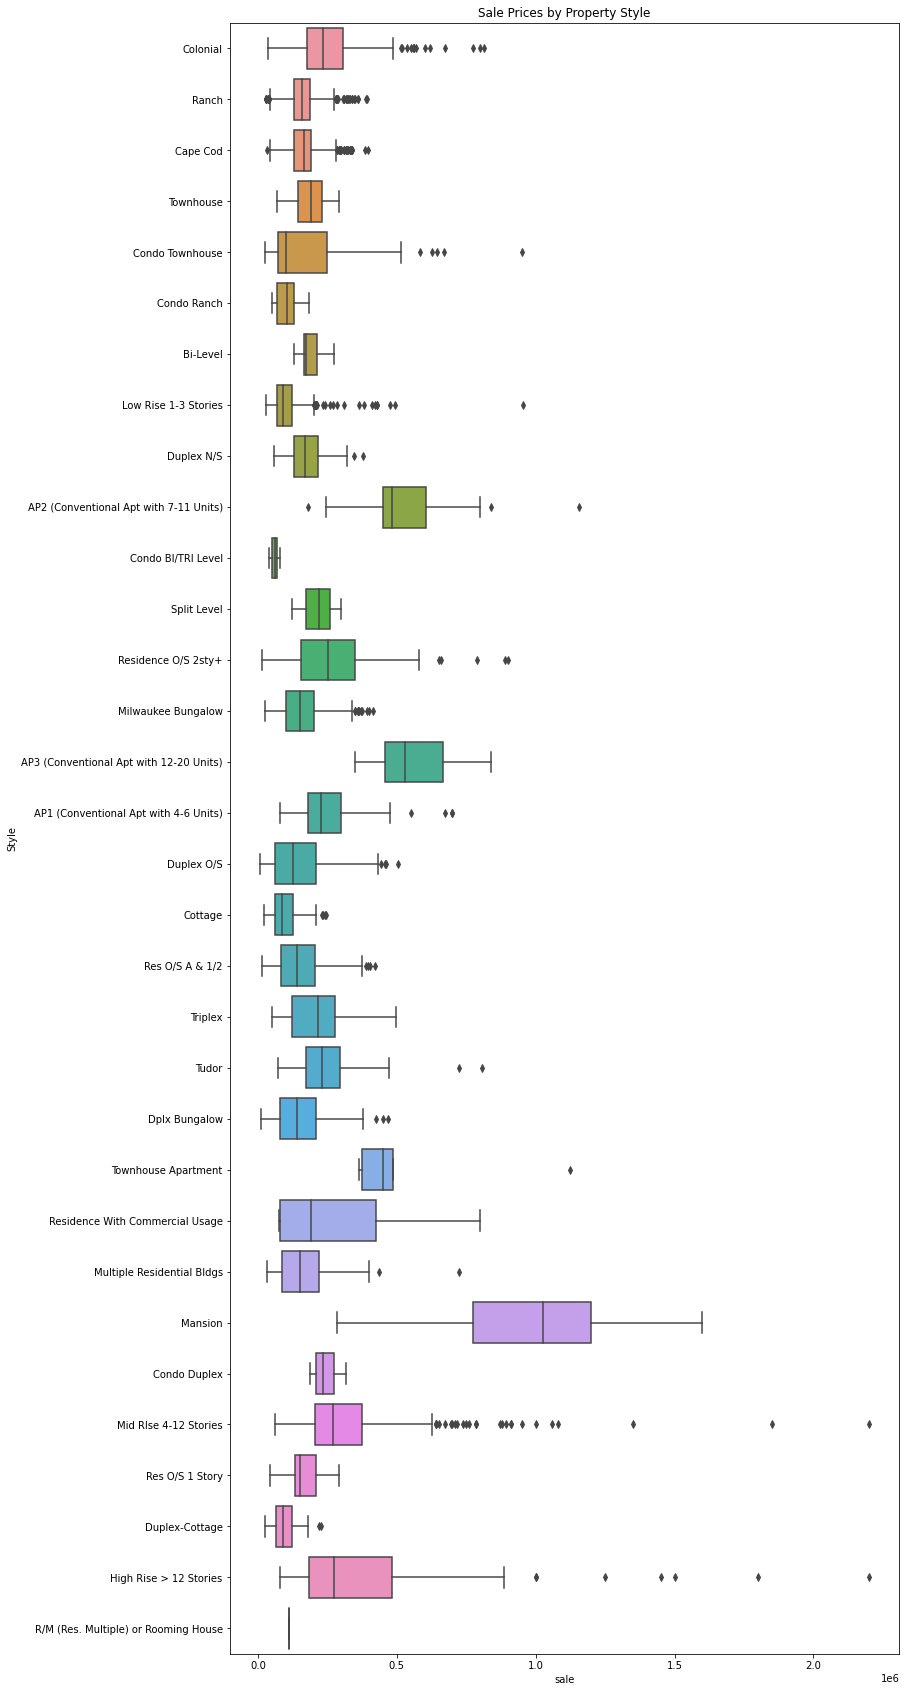

In [122]:
fig, ax = plt.subplots(figsize=(12,30))

sns.boxplot(x="sale",y='Style', data = house2, orient='h').set_title('Sale Prices by Property Style')


'Sale_date' column needs to be converted from Object type to Datetime for sorting

In [66]:
house2['Date'] = pd.to_datetime(house2['Sale_date'])

/var/folders/18/c9qxbdrj57j0v40wm5dy0j9w0000gn/T/ipykernel_92165/1174595651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['Date'] = pd.to_datetime(house['Sale_date'])


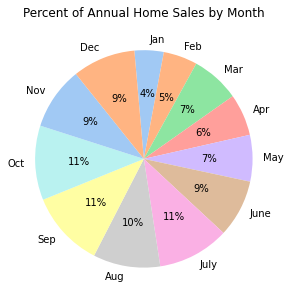

In [123]:
labels =['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
colors = sns.color_palette('pastel')[0:11]

fig,ax = plt.subplots(figsize=(5,5))
ax.pie(house2.groupby(pd.Grouper(key='Date', axis=0, freq='M')).count()['PropertyID'], labels = labels, colors = colors, autopct='%.0f%%',counterclock=False,startangle=95)
ax.set_title("Percent of Annual Home Sales by Month")
plt.show()
